In [1]:
from underlying import Underlying
from option import Option, Vanilla
from trader import Trader

import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm
from quantile_hedging_calculator import *
import numpy as np
import pandas as pd

In [2]:
mu = 0.06
sigma =  0.2
r = 0.05
T = 1
X0 = 100
repeat = 1000
values_per_year = 250

## Full hedging - Vanilla Call

In [3]:
K = 80

In [4]:
underlying = Underlying(mu, sigma, r, values_per_year)

In [5]:
_, reality = underlying.simulate_P(repeat, T)

In [6]:
vanilla_call = Vanilla(underlying, K, T, True)

In [7]:
BS_price_call = vanilla_call.get_price(X0, 0)
BS_price_call

24.58883544392775

In [8]:
money_time_call = pd.DataFrame(np.zeros(reality.shape))
delta_time_call = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_call)
    money, delta, _ = trader.simulate_hedging(vanilla_call, X0*reality.iloc[[i],:], update_freq = 1)
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta

100%|███████████████████████████████████████| 1000/1000 [00:44<00:00, 22.35it/s]


(0.0, 250.0)

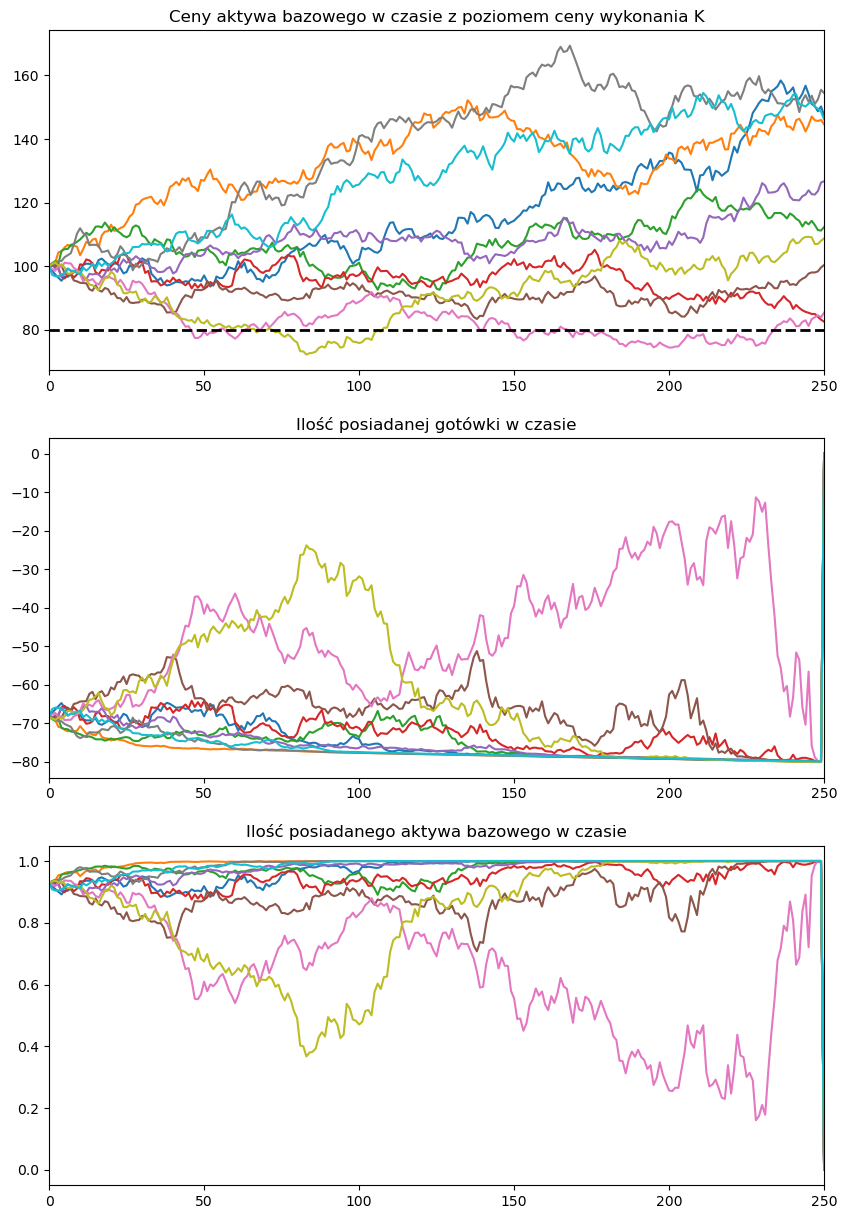

In [9]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0*reality.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

Text(0.5, 1.0, 'Ostateczny stan portfela po potencjalnym wypłaceniu payoffu\n mean = 0.007, std = 0.204')

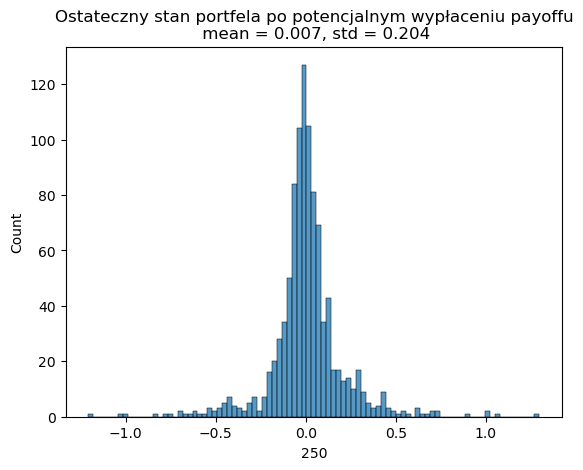

In [10]:
sb.histplot(money_time_call.iloc[:,-1]).set_title(f'Ostateczny stan portfela po potencjalnym wypłaceniu payoffu\n mean = {money_time_call.iloc[:,-1].mean():.3f}, std = {money_time_call.iloc[:,-1].std():.3f}')

## Full hedging - Vanilla Put

In [11]:
K = 120

In [12]:
underlying = Underlying(mu, sigma, r, values_per_year)

In [13]:
_, reality = underlying.simulate_P(repeat, T)

In [14]:
vanilla_put = Vanilla(underlying, K, T, False)

In [15]:
BS_price_put = vanilla_put.get_price(X0, 0)
BS_price_put

17.3950083566465

In [16]:
money_time_put = pd.DataFrame(np.zeros(reality.shape))
delta_time_put = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = BS_price_put)
    money, delta, _ = trader.simulate_hedging(vanilla_put, X0*reality.iloc[[i],:], update_freq = 1)
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta

100%|███████████████████████████████████████| 1000/1000 [00:43<00:00, 23.11it/s]


(0.0, 250.0)

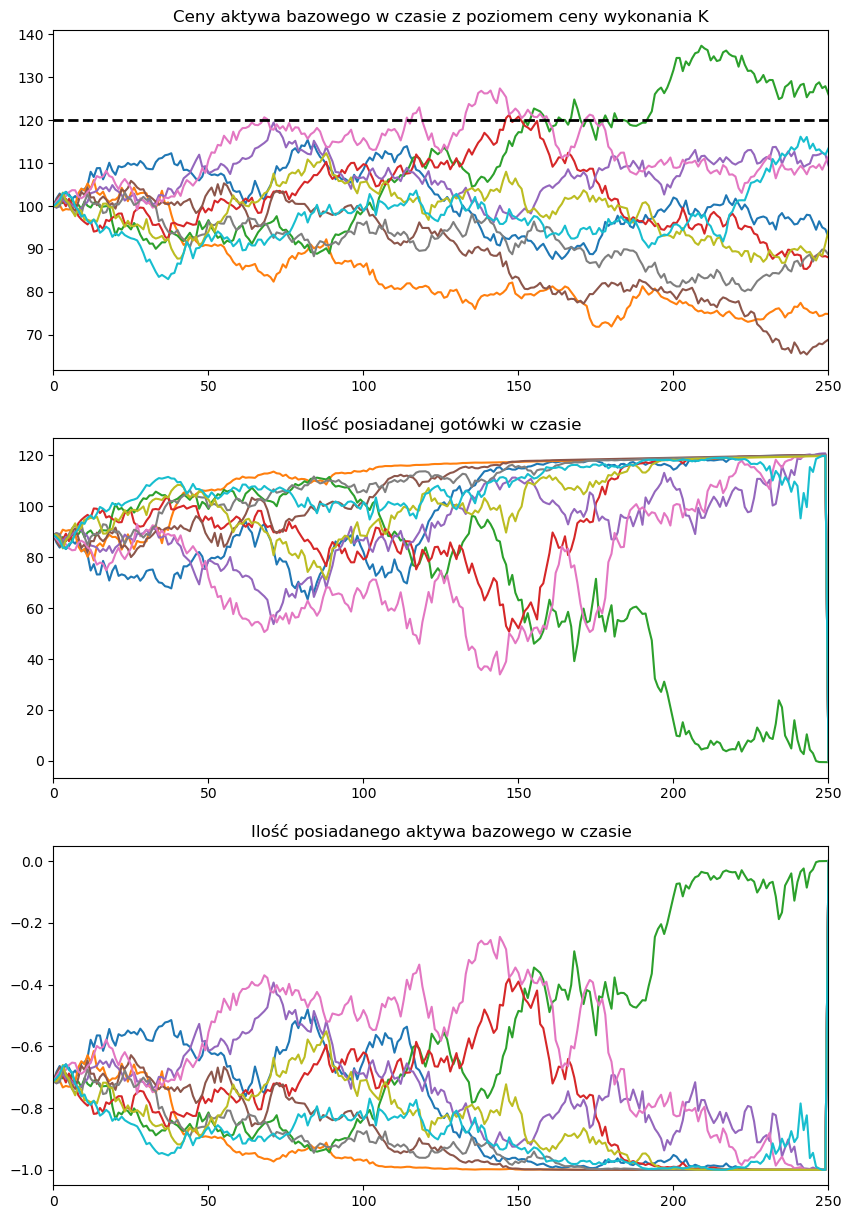

In [17]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0*reality.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

Text(0.5, 1.0, 'Ostateczny stan portfela po potencjalnym wypłaceniu payoffu\n mean = -0.010, std = 0.456')

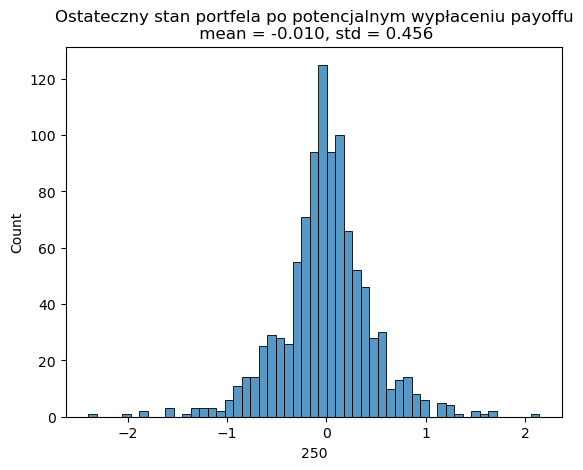

In [18]:
sb.histplot(money_time_put.iloc[:,-1]).set_title(f'Ostateczny stan portfela po potencjalnym wypłaceniu payoffu\n mean = {money_time_put.iloc[:,-1].mean():.3f}, std = {money_time_put.iloc[:,-1].std():.3f}')

## Quantile hedging with half of required initial capital- Vanilla Call

In [19]:
K = 80

In [20]:
underlying = Underlying(mu, sigma, r, values_per_year)

In [21]:
_, reality = underlying.simulate_P(repeat, T)

In [22]:
V0 = BS_price_call / 2

In [23]:
money_time_call = pd.DataFrame(np.zeros(reality.shape))
delta_time_call = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, success_prob = trader.simulate_hedging(vanilla_call, X0*reality.iloc[[i],:], update_freq = 1, limited_capital = True)
    money_time_call.loc[i] = money
    delta_time_call.loc[i] = delta
print(f'Success probability with initial capital={V0:.2f} is: {success_prob}')

100%|███████████████████████████████████████| 1000/1000 [05:11<00:00,  3.21it/s]

Success probability with initial capital=12.29 is: 0.6427


(0.0, 250.0)

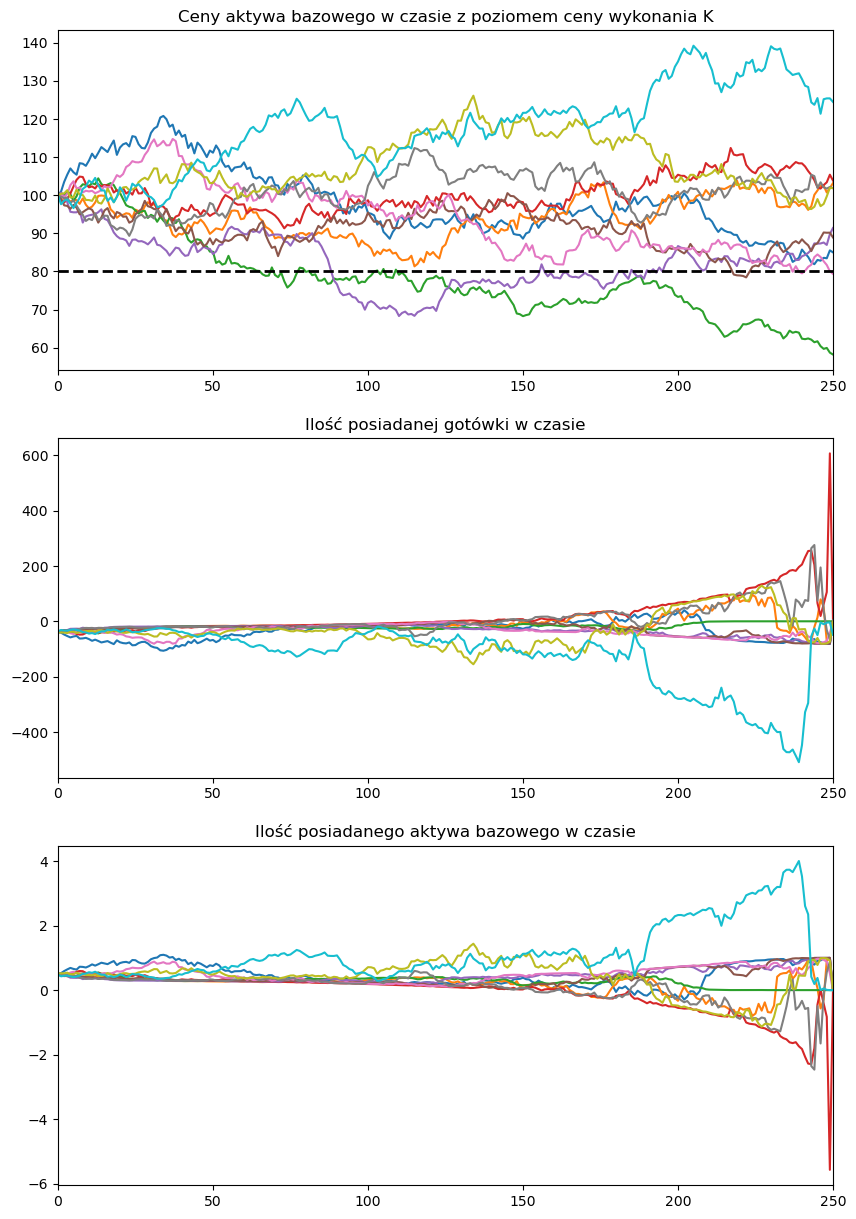

In [24]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0*reality.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_call.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

Text(0.5, 1.0, 'Ostateczny stan portfela po potencjalnym wypłaceniu payoffu\n mean = -13.334, std = 18.122')

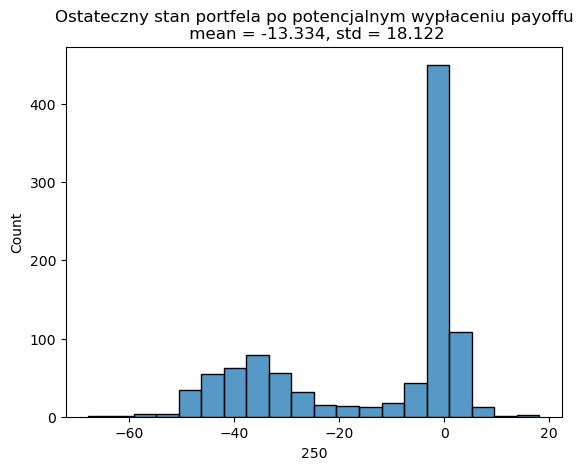

In [25]:
sb.histplot(money_time_call.iloc[:,-1], bins = 20).set_title(f'Ostateczny stan portfela po potencjalnym wypłaceniu payoffu\n mean = {money_time_call.iloc[:,-1].mean():.3f}, std = {money_time_call.iloc[:,-1].std():.3f}')

Text(0.5, 1.0, 'Ostateczny stan portfela- wszystkie symulacje')

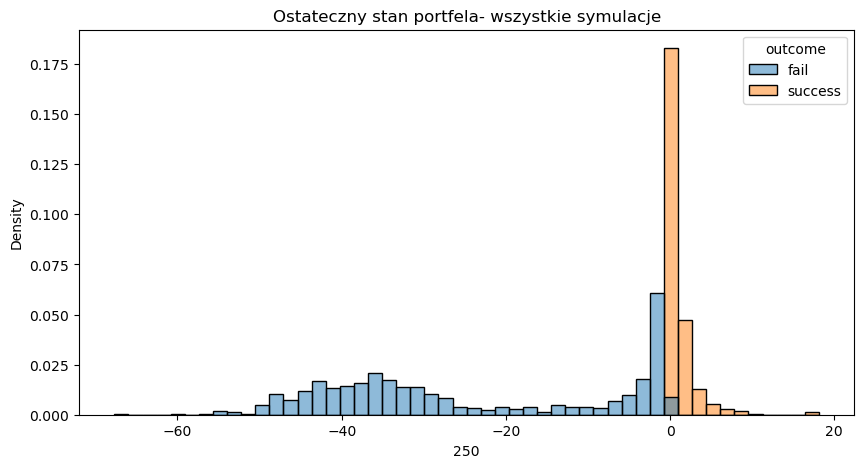

In [26]:
money_time_call_outcome = money_time_call.copy()
money_time_call_outcome['outcome'] = money_time_call.apply(lambda row: 'success' if row.iloc[-1] >= - 0.05 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_call_outcome[underlying.values_per_year * T], bins = 50, hue = money_time_call_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [27]:
money_time_call_outcome[['outcome',underlying.values_per_year * T]].groupby('outcome').describe()

250                                                         \
         count       mean        std        min        25%        50%   
outcome                                                                 
fail     563.0 -24.378766  17.356159 -67.685893 -38.776939 -30.308285   
success  437.0   0.894529   1.932491  -0.613829  -0.111457   0.354271   

                              
              75%        max  
outcome                       
fail    -3.746645  -0.618377  
success  1.068148  18.118754

Text(0.5, 1.0, 'Ostateczny payoff opcji- wszystkie symulacje')

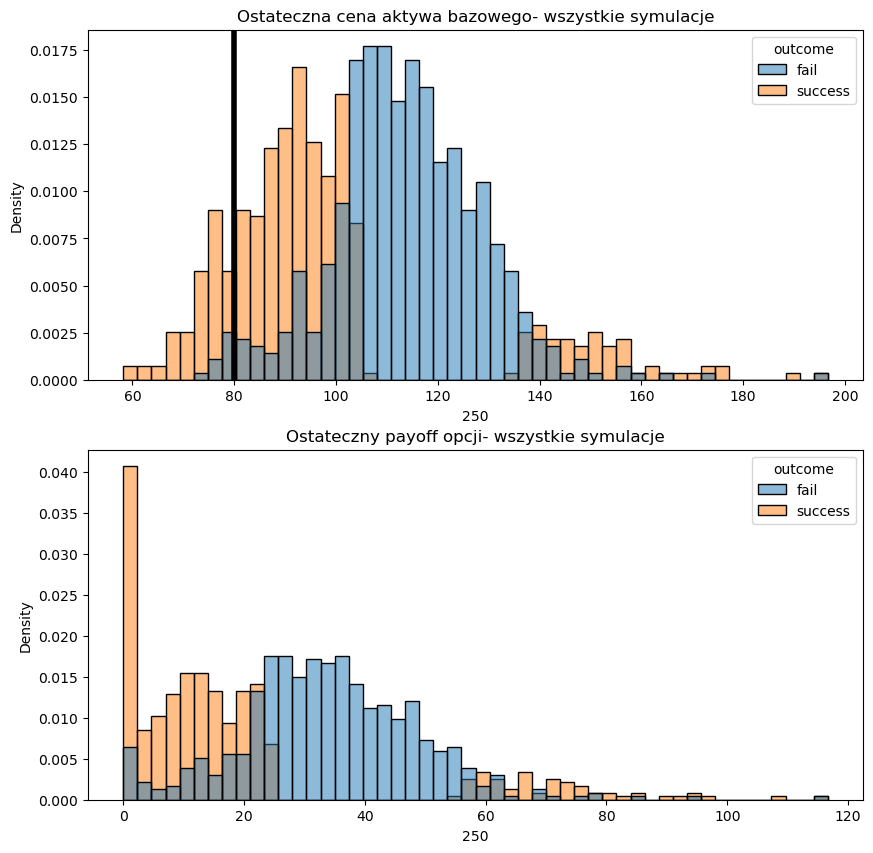

In [28]:
fig, axs = plt.subplots(2,1, figsize = (10, 10))
sb.histplot(ax = axs[0], x = (X0*reality)[underlying.values_per_year * T], hue = money_time_call_outcome['outcome'], bins = 50, stat = 'density').set_title('Ostateczna cena aktywa bazowego- wszystkie symulacje')
axs[0].axvline(K, color = 'black', lw = 4)
sb.histplot(ax = axs[1], x = np.maximum((X0*reality)[underlying.values_per_year * T] - K,0), hue = money_time_call_outcome['outcome'], bins = 50, stat = 'density').set_title('Ostateczny payoff opcji- wszystkie symulacje')

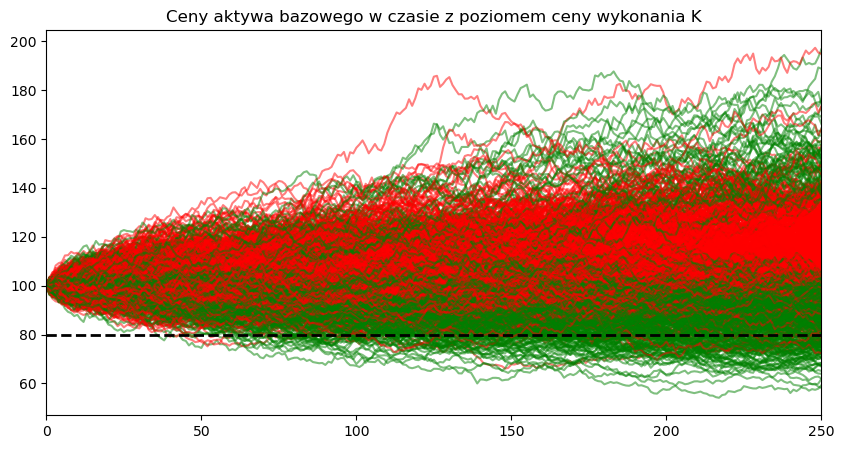

In [29]:
fig, axs = plt.subplots(1, 1, figsize = (10, 5))
(X0*reality).T.plot.line(ax = axs, alpha = 0.5, legend = False, color = money_time_call_outcome.apply(lambda row: 'green' if row['outcome'] == 'success' else 'red', axis = 1), title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs.set_xlim([0,values_per_year])
axs.axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)

## Quantile hedging with half of required initial capital- Vanilla Put

In [30]:
K = 120

In [31]:
underlying = Underlying(mu, sigma, r, values_per_year)

In [32]:
_, reality = underlying.simulate_P(repeat, T)

In [33]:
V0 = BS_price_put / 2

In [34]:
money_time_put = pd.DataFrame(np.zeros(reality.shape))
delta_time_put = pd.DataFrame(np.zeros(reality.shape))
for i in tqdm(range(repeat)):
    trader = Trader(initial_capital = V0)
    money, delta, success_prob = trader.simulate_hedging(vanilla_put, X0*reality.iloc[[i],:], update_freq = 1, limited_capital = True)
    money_time_put.loc[i] = money
    delta_time_put.loc[i] = delta
print(f'Success probability with initial capital={V0:.2f} is: {success_prob}')

100%|███████████████████████████████████████| 1000/1000 [05:16<00:00,  3.16it/s]

Success probability with initial capital=8.70 is: 0.7137


(0.0, 250.0)

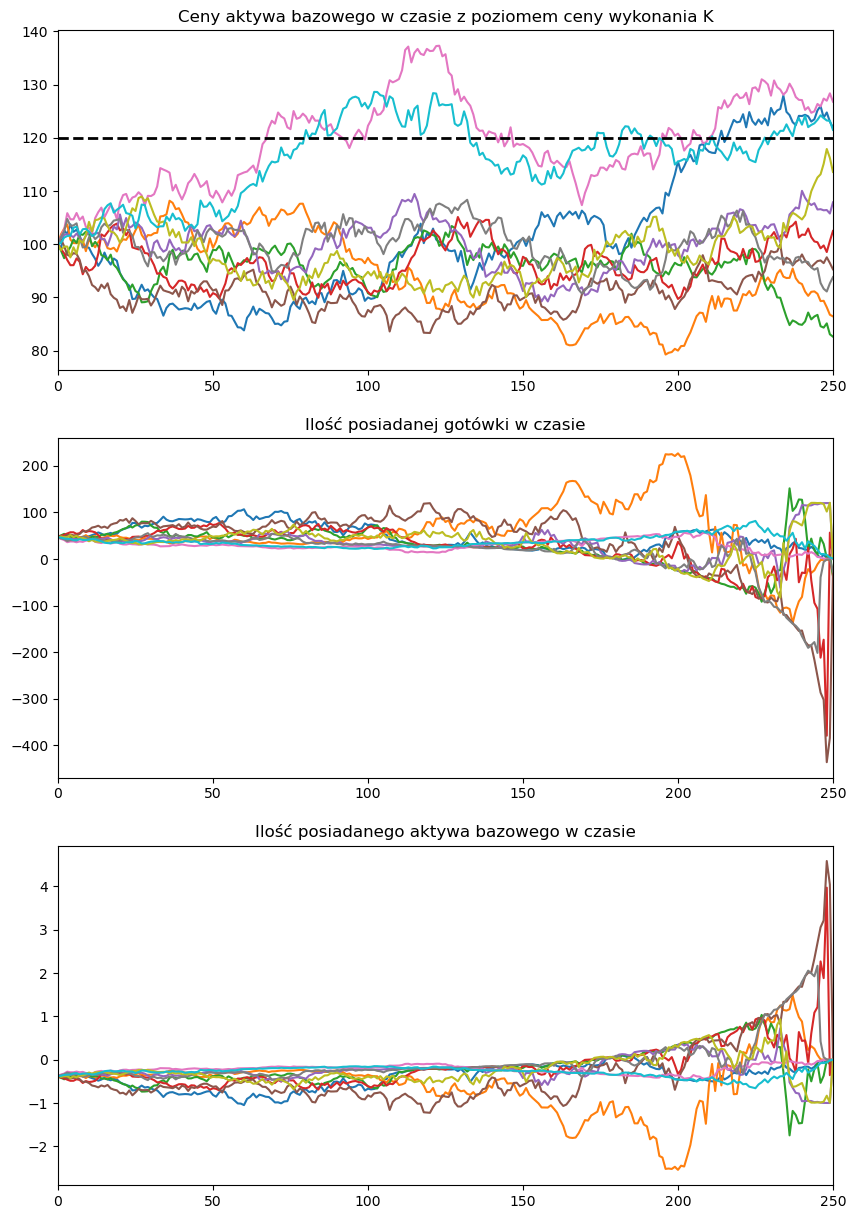

In [35]:
fig, axs = plt.subplots(3,1, figsize = (10, 15))
(X0*reality.iloc[:10,:]).T.plot.line(legend = False, ax = axs[0], title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs[0].set_xlim([0,values_per_year])
axs[0].axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)
(money_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[1], title = 'Ilość posiadanej gotówki w czasie')
axs[1].set_xlim([0,values_per_year])
(delta_time_put.iloc[:10,:]).T.plot(legend = False, ax = axs[2], title = 'Ilość posiadanego aktywa bazowego w czasie')
axs[2].set_xlim([0,values_per_year])

Text(0.5, 1.0, 'Ostateczny stan portfela po potencjalnym wypłaceniu payoffu\n mean = -8.896, std = 13.724')

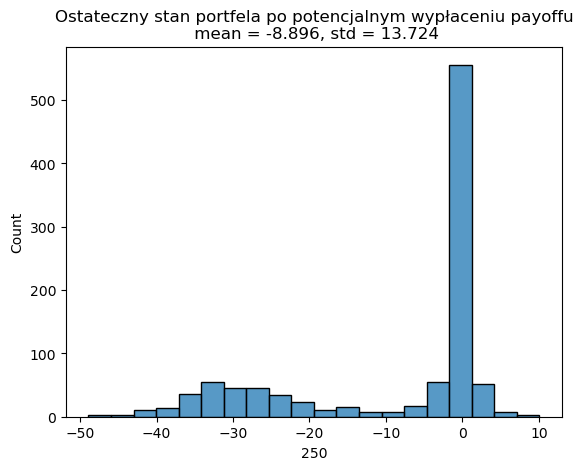

In [36]:
sb.histplot(money_time_put.iloc[:,-1], bins = 20).set_title(f'Ostateczny stan portfela po potencjalnym wypłaceniu payoffu\n mean = {money_time_put.iloc[:,-1].mean():.3f}, std = {money_time_put.iloc[:,-1].std():.3f}')

Text(0.5, 1.0, 'Ostateczny stan portfela- wszystkie symulacje')

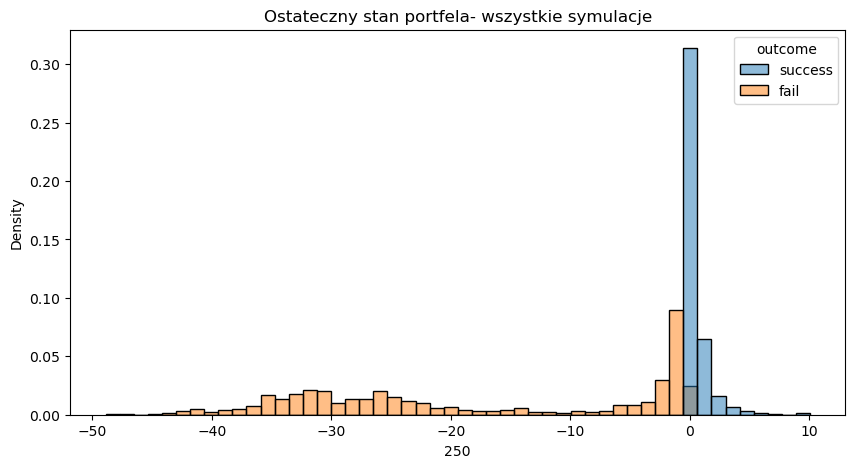

In [37]:
money_time_put_outcome = money_time_put.copy()
money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 0.05 * V0 else 'fail', axis = 1)
plt.figure(figsize = (10, 5))
sb.histplot(x = money_time_put_outcome[underlying.values_per_year * T], bins = 50, hue = money_time_put_outcome['outcome'], legend = True, stat = 'density').set_title(f'Ostateczny stan portfela- wszystkie symulacje')

In [38]:
money_time_put_outcome[['outcome',underlying.values_per_year * T]].groupby('outcome').describe()

250                                                         \
         count       mean        std        min        25%        50%   
outcome                                                                 
fail     518.0 -17.640271  14.277329 -48.904562 -30.601886 -20.934068   
success  482.0   0.501013   1.119165  -0.433509  -0.088620   0.205211   

                              
              75%        max  
outcome                       
fail    -1.537567  -0.435523  
success  0.589262  10.064843

Text(0.5, 1.0, 'Ostateczny payoff opcji- wszystkie symulacje')

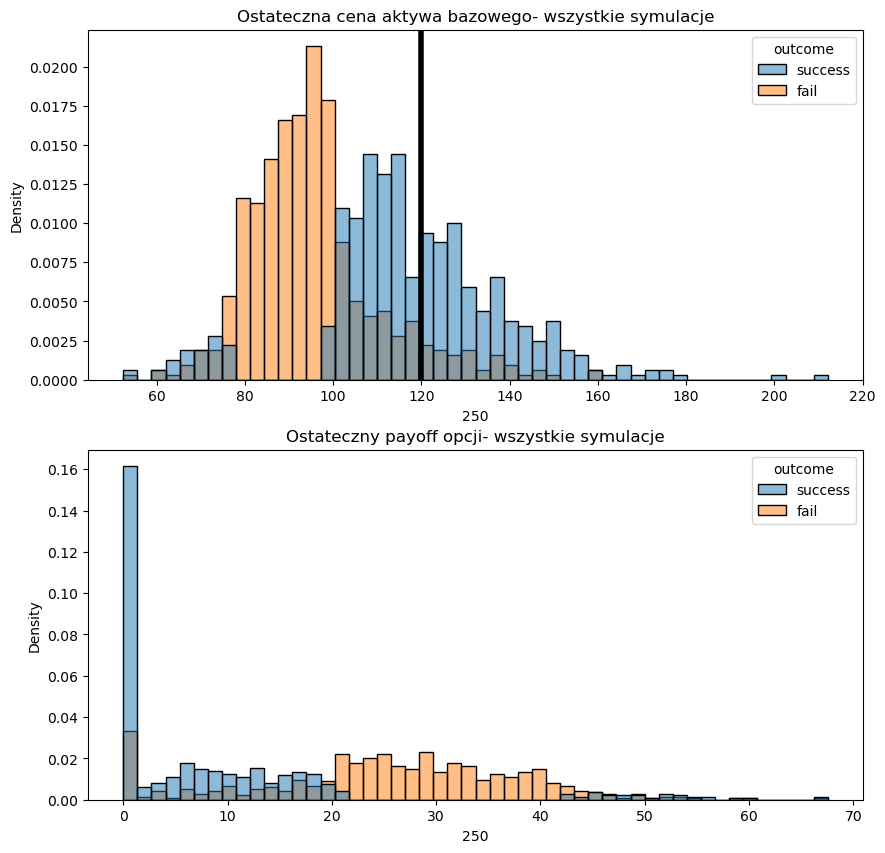

In [39]:
fig, axs = plt.subplots(2,1, figsize = (10, 10))
sb.histplot(ax = axs[0], x = (X0*reality)[underlying.values_per_year * T], hue = money_time_put_outcome['outcome'], bins = 50, stat = 'density').set_title('Ostateczna cena aktywa bazowego- wszystkie symulacje')
axs[0].axvline(K, color = 'black', lw = 4)
sb.histplot(ax = axs[1], x = np.maximum(K - (X0*reality)[underlying.values_per_year * T],0), hue = money_time_put_outcome['outcome'], bins = 50, stat = 'density').set_title('Ostateczny payoff opcji- wszystkie symulacje')

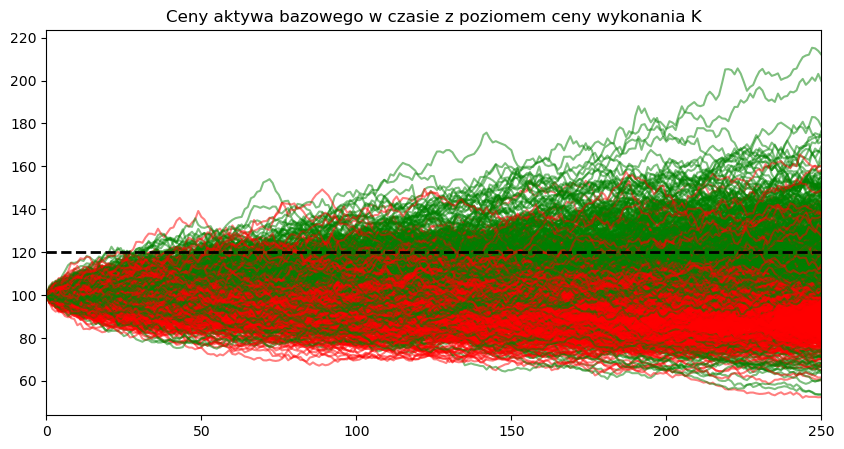

In [40]:
fig, axs = plt.subplots(1, 1, figsize = (10, 5))
(X0*reality).T.plot.line(ax = axs, alpha = 0.5, legend = False, color = money_time_put_outcome.apply(lambda row: 'green' if row['outcome'] == 'success' else 'red', axis = 1), title = 'Ceny aktywa bazowego w czasie z poziomem ceny wykonania K')
axs.set_xlim([0,values_per_year])
axs.axhline(y=K, xmin=0, xmax=249, color='black', linestyle='--', lw=2)

## Tests on modified payoff properties

### Vanilla call

In [41]:
K = 80
vanilla_call = Vanilla(underlying, K, T, True)

In [42]:
payoff_func_v0, success_prob, cs = payoff_from_v0(vanilla_call, BS_price_call/2, X0)
print(f'Success prob for V0={BS_price_call/2:.2f}: {success_prob:.5f}')
payoff_func_prob, success_V0, _ = payoff_from_prob(vanilla_call, success_prob, X0)
print(f'Proper V0 for success prob={success_prob:.2f}: {success_V0:.2f}')

Success prob for V0=12.29: 0.64890
Proper V0 for success prob=0.65: 12.46


In [43]:
W, X = vanilla_call.underlying.simulate_P(10000, T=vanilla_call.T)

Text(0.5, 0.98, "Simulations final value and option's modified payoffs together with K and c boundaries")

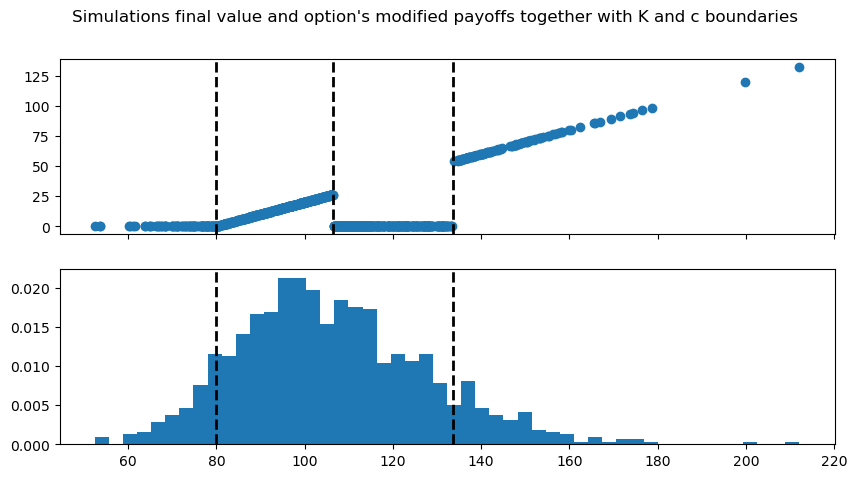

In [44]:
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (10, 5))
axs[0].scatter(X0*reality.iloc[:,-1], payoff_func_v0(X0*reality))
axs[0].axvline(K, color = 'black', linestyle = '--', lw = 2)
for c in cs:
    if c > 0:
        axs[0].axvline(c, color = 'black', linestyle = '--', lw = 2)
axs[1].hist(X0*reality.iloc[:,-1], bins = 50, density = True)
axs[1].axvline(K, color = 'black', linestyle = '--', lw = 2)
for c in cs:
    if c > 0:
        axs[1].axvline(c, color = 'black', linestyle = '--', lw = 2)
plt.suptitle("Simulations final value and option's modified payoffs together with K and c boundaries")

### Vanilla put

In [45]:
K = 120
vanilla_put = Vanilla(underlying, K, T, False)

In [46]:
payoff_func_v0, success_prob, cs = payoff_from_v0(vanilla_put, BS_price_put/2, X0)
print(f'Success prob for V0={BS_price_put/2:.2f}: {success_prob:.2f}')
payoff_func_prob, success_V0, _ = payoff_from_prob(vanilla_put, success_prob, X0)
print(f'Proper V0 for success prob={success_prob}: {success_V0:.2f}')

Success prob for V0=8.70: 0.71
Proper V0 for success prob=0.7125: 8.97


Text(0.5, 0.98, "Simulations final value and option's modified payoffs together with K and c boundaries")

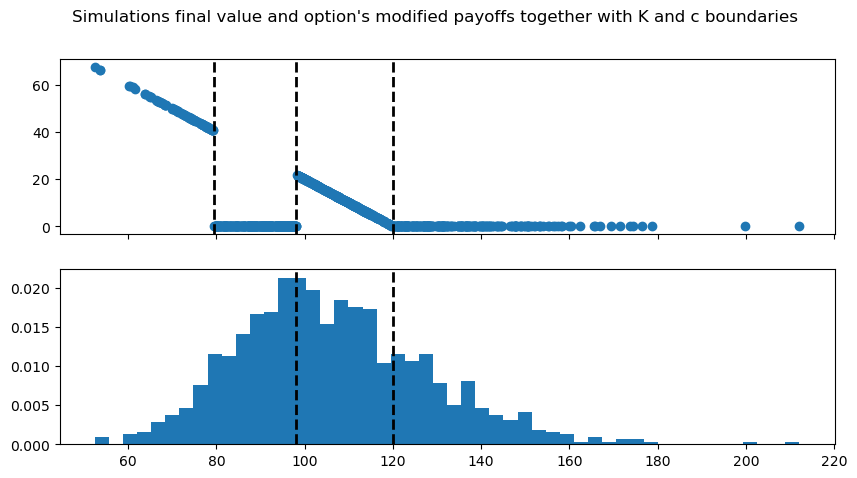

In [47]:
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (10, 5))
axs[0].scatter(X0*reality.iloc[:,-1], payoff_func_v0(X0*reality))
axs[0].axvline(K, color = 'black', linestyle = '--', lw = 2)
for c in cs:
    if c > 0:
        axs[0].axvline(c, color = 'black', linestyle = '--', lw = 2)
axs[1].hist(X0*reality.iloc[:,-1], bins = 50, density = True)
axs[1].axvline(K, color = 'black', linestyle = '--', lw = 2)
for c in cs:
    if c > 0:
        axs[1].axvline(c, color = 'black', linestyle = '--', lw = 2)
plt.suptitle("Simulations final value and option's modified payoffs together with K and c boundaries")

## Sensivity analysis on $\alpha$ vs success probability

### Vanilla call

4it [00:28,  7.08s/it]


Text(0.5, 0.98, 'Quantile hedging on vanilla call\nalpha level vs success probability')

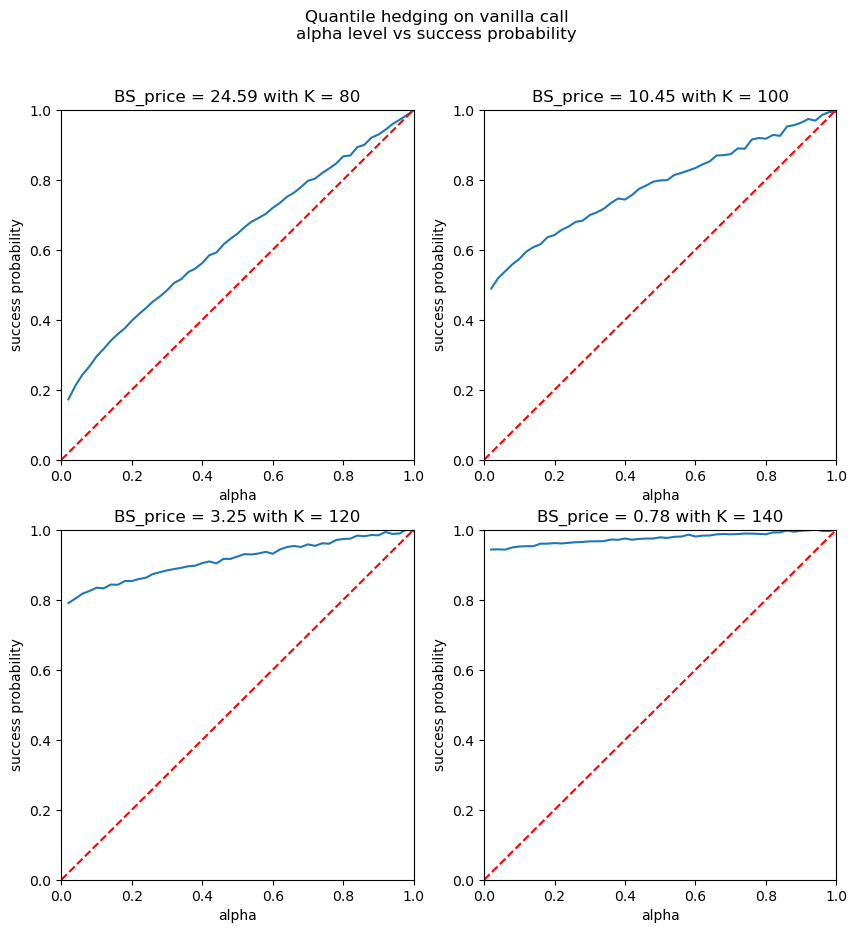

In [48]:
Ks = [80, 100, 120, 140]
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for num, K in tqdm(enumerate(Ks)):
    vanilla_call = Vanilla(underlying, K, T, True)
    BS_price = vanilla_call.get_price(X0, 0)
    alphas = np.arange(2,101,2)/100
    probs = []
    for a in alphas:
        _, success_prob, _ = payoff_from_v0(vanilla_call, a * BS_price, X0)
        probs.append(success_prob)
    axs[num//2, num%2].plot(alphas, probs)
    axs[num//2, num%2].plot([0,1],[0,1], color = 'red', linestyle='--')
    axs[num//2, num%2].set_title(f'BS_price = {BS_price:.2f} with K = {K}')
    axs[num//2, num%2].set_xlabel('alpha')
    axs[num//2, num%2].set_ylabel('success probability')
    axs[num//2, num%2].set_xlim([0,1])
    axs[num//2, num%2].set_ylim([0,1])
plt.suptitle('Quantile hedging on vanilla call\nalpha level vs success probability')

4it [20:30, 307.65s/it]


Text(0.5, 0.98, 'Quantile hedging on vanilla call\nfinal simulation values')

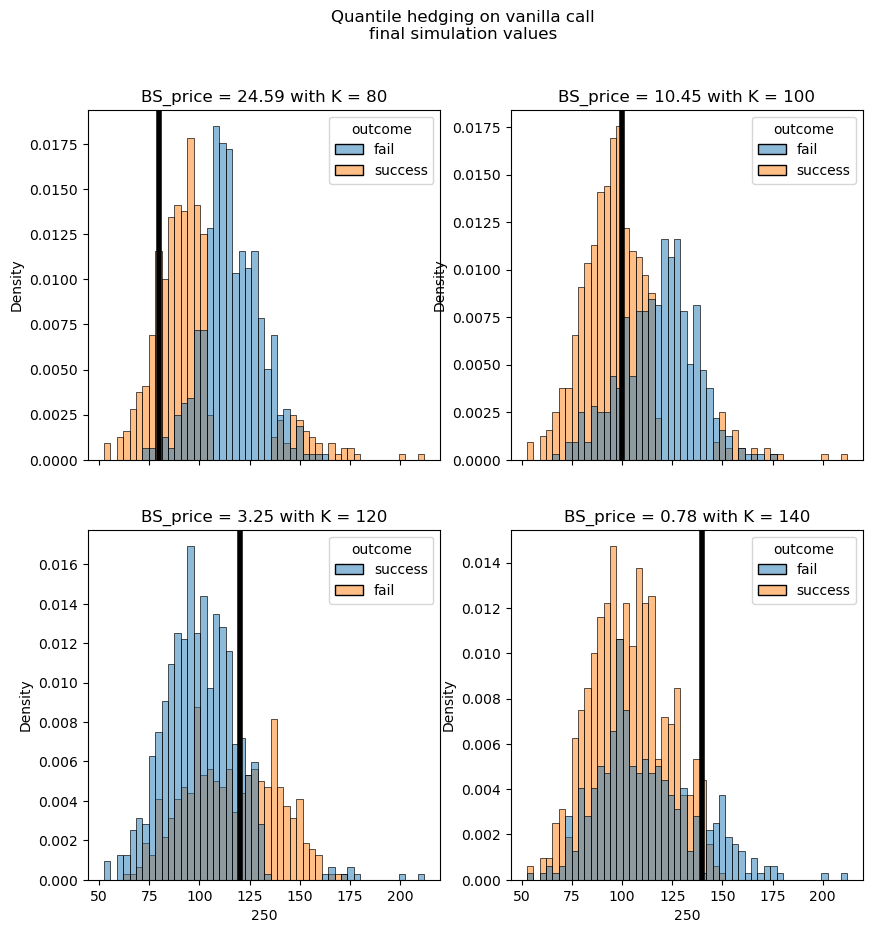

In [49]:
Ks = [80, 100, 120, 140]
fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex = True)
for num, K in tqdm(enumerate(Ks)):
    vanilla_call = Vanilla(underlying, K, T, True)
    BS_price = vanilla_call.get_price(X0, 0)
    V0 = 0.5 * BS_price
    money_time_call = pd.DataFrame(np.zeros(reality.shape))
    delta_time_call = pd.DataFrame(np.zeros(reality.shape))
    for i in range(repeat):
        trader = Trader(initial_capital = V0)
        money, delta, success_prob = trader.simulate_hedging(vanilla_call, X0*reality.iloc[[i],:], update_freq = 1, limited_capital = True)
        money_time_call.loc[i] = money
        delta_time_call.loc[i] = delta
    money_time_call_outcome = money_time_call.copy()
    money_time_call_outcome['outcome'] = money_time_call.apply(lambda row: 'success' if row.iloc[-1] >= - 0.05 * V0 else 'fail', axis = 1)
    sb.histplot(ax = axs[num//2, num%2], x = (X0*reality)[underlying.values_per_year * T], hue = money_time_call_outcome['outcome'], bins = 50, stat = 'density').set_title(f'BS_price = {BS_price:.2f} with K = {K}')
    axs[num//2, num%2].axvline(K, color = 'black', lw = 4)
plt.suptitle('Quantile hedging on vanilla call\nfinal simulation values')

### Vanilla put

4it [00:27,  6.81s/it]


Text(0.5, 0.98, 'Quantile hedging on vanilla put\nalpha level vs success probability')

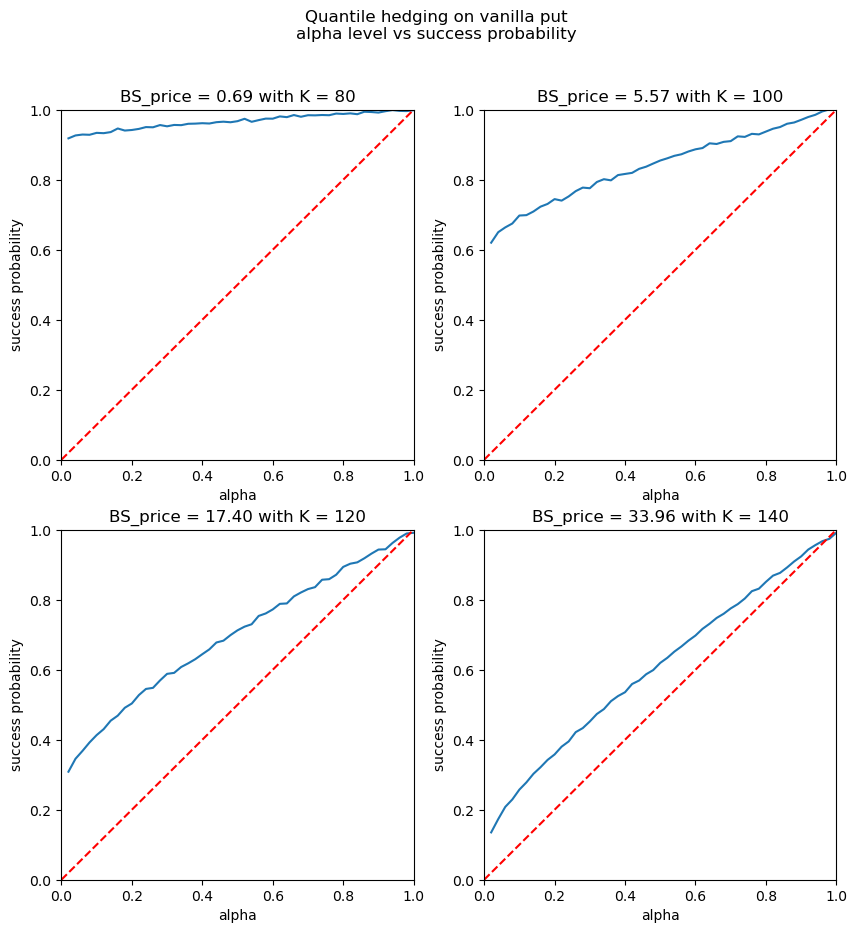

In [50]:
Ks = [80, 100, 120, 140]
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for num, K in tqdm(enumerate(Ks)):
    vanilla_put = Vanilla(underlying, K, T, False)
    BS_price = vanilla_put.get_price(X0, 0)
    alphas = np.arange(2,101,2)/100
    probs = []
    for a in alphas:
        _, success_prob, _ = payoff_from_v0(vanilla_put, a * BS_price, X0)
        probs.append(success_prob)
    axs[num//2, num%2].plot(alphas, probs)
    axs[num//2, num%2].plot([0,1],[0,1], color = 'red', linestyle='--')
    axs[num//2, num%2].set_title(f'BS_price = {BS_price:.2f} with K = {K}')
    axs[num//2, num%2].set_xlabel('alpha')
    axs[num//2, num%2].set_ylabel('success probability')
    axs[num//2, num%2].set_xlim([0,1])
    axs[num//2, num%2].set_ylim([0,1])
plt.suptitle('Quantile hedging on vanilla put\nalpha level vs success probability')

4it [21:17, 319.27s/it]


Text(0.5, 0.98, 'Quantile hedging on vanilla put\nfinal simulation values')

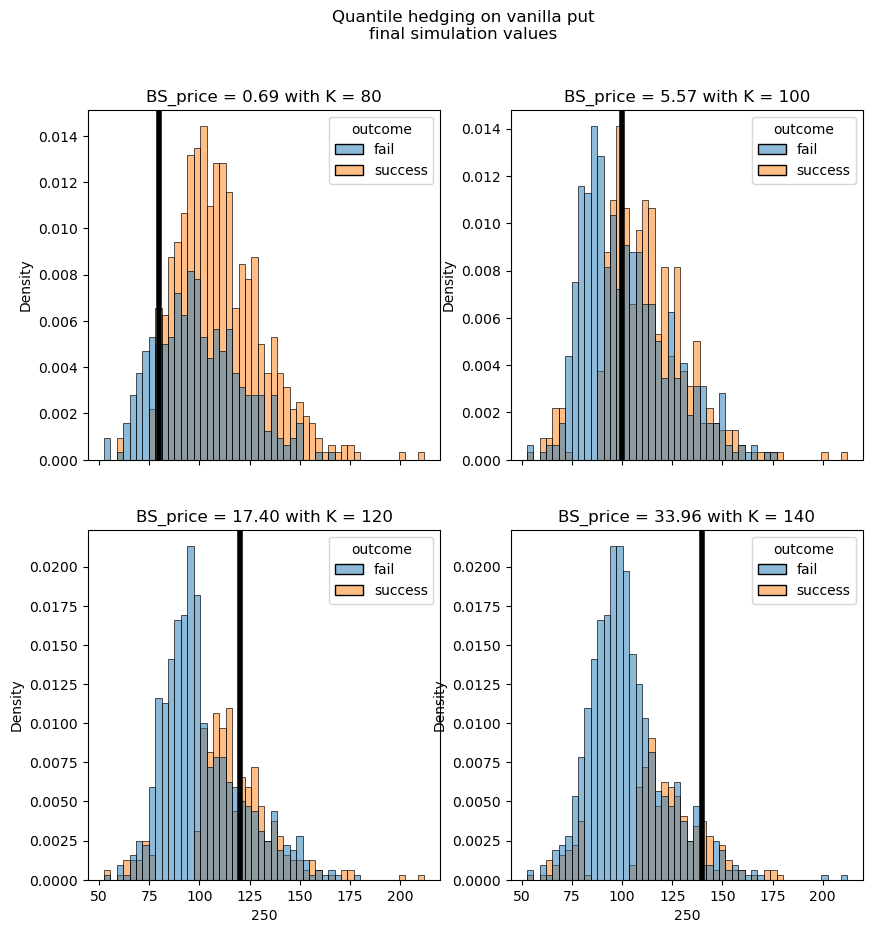

In [51]:
Ks = [80, 100, 120, 140]
fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex = True)
for num, K in tqdm(enumerate(Ks)):
    vanilla_put = Vanilla(underlying, K, T, False)
    BS_price = vanilla_put.get_price(X0, 0)
    money_time_put = pd.DataFrame(np.zeros(reality.shape))
    delta_time_put = pd.DataFrame(np.zeros(reality.shape))
    for i in range(repeat):
        trader = Trader(initial_capital = 0.5 * BS_price)
        money, delta, success_prob = trader.simulate_hedging(vanilla_put, X0*reality.iloc[[i],:], update_freq = 1, limited_capital = True)
        money_time_put.loc[i] = money
        delta_time_put.loc[i] = delta
    money_time_put_outcome = money_time_put.copy()
    money_time_put_outcome['outcome'] = money_time_put.apply(lambda row: 'success' if row.iloc[-1] >= - 0.05 * V0 else 'fail', axis = 1)
    sb.histplot(ax = axs[num//2, num%2], x = (X0*reality)[underlying.values_per_year * T], hue = money_time_put_outcome['outcome'], bins = 50, stat = 'density').set_title(f'BS_price = {BS_price:.2f} with K = {K}')
    axs[num//2, num%2].axvline(K, color = 'black', lw = 4)
plt.suptitle('Quantile hedging on vanilla put\nfinal simulation values')